In [172]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
img_path = './people.jpeg'

In [4]:
img = cv2.imread(img_path)

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

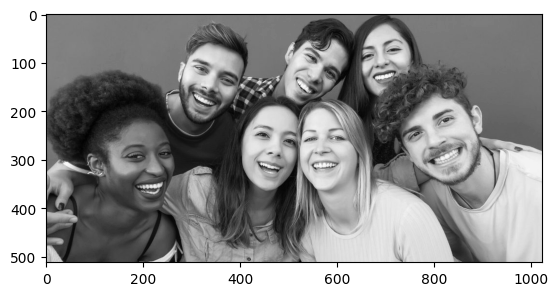

In [5]:
plt.imshow(img_gray, cmap='gray')

In [6]:
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)

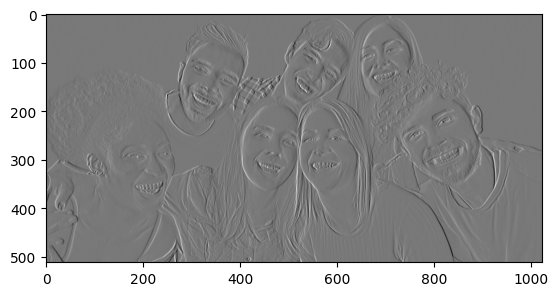

In [7]:
plt.imshow(sobel_x, cmap='gray')

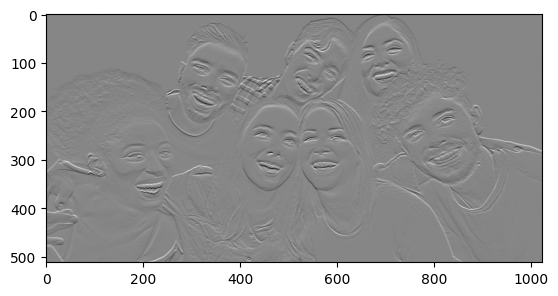

In [8]:
plt.imshow(sobel_y, cmap='gray')

In [9]:
canny = cv2.Canny(img_gray,100,300)

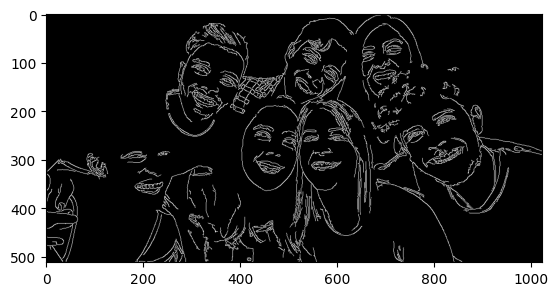

In [10]:
plt.imshow(canny, cmap='gray')

In [11]:
# Find cuotours in edge detected images 
contours, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x, y), (x+h, y+h), (255, 25, 0), 2)

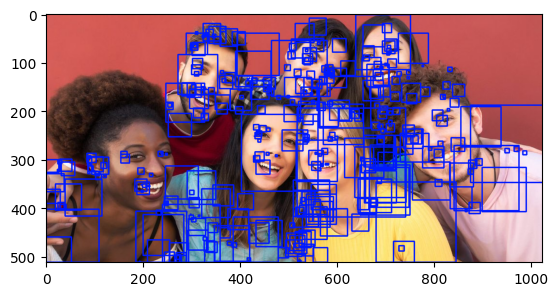

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')

In [222]:
def edge_detection_and_contours(imgpath):
    img = cv2.imread(imgpath)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0,   1, ksize=3)
    canny = cv2.Canny(img_gray,100,300)
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
    # Find cuotours in edge detected images 
    contours, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x+h, y+h), (255, 25, 0), 2)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Gray')
    plt.show()
    plt.imshow(sobel_x,cmap='gray')
    plt.title('Sobel')
    plt.show()
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian')
    plt.show()
    plt.imshow(canny, cmap='gray')
    plt.title('Canny')
    plt.show()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title('Contour')
        

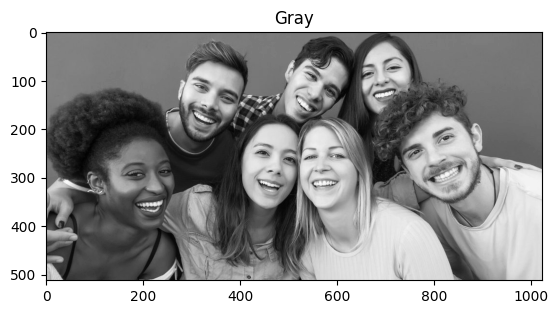

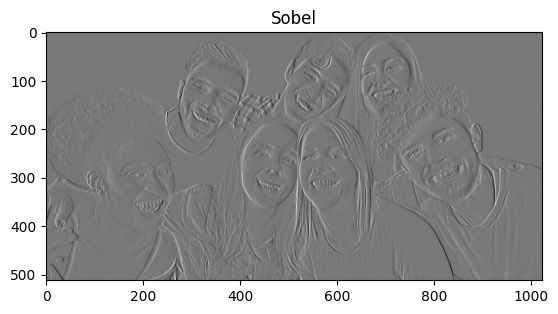

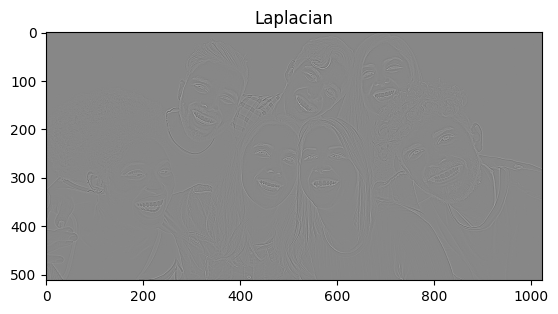

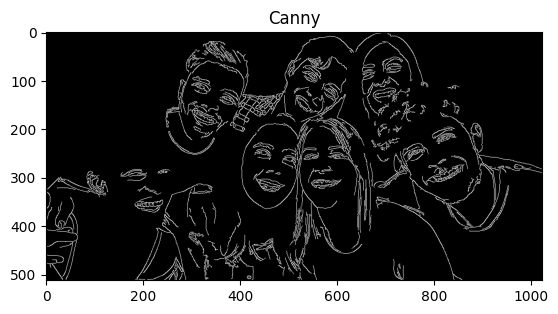

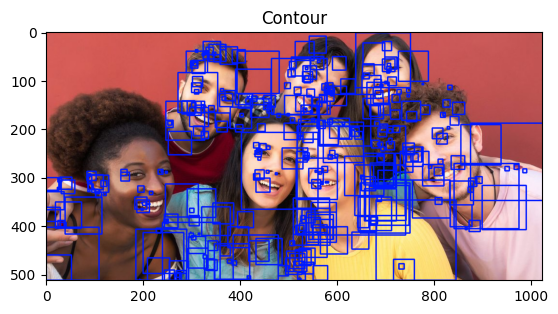

In [223]:
edge_detection_and_contours(img_path)

# Persepctive Transformation and image wrapping

In [26]:
imgpath = './perspective-img.webp'
img = cv2.imread(imgpath)

In [28]:
pt_A = [8, 247]
pt_B = [308, 367]
pt_C = [415, 56]
pt_D = [222, 18]

In [29]:
width, height = 300, 300
import numpy as np
destination_pts = np.array([[0,0], 
                           [width-1,0], 
                           [width-1, height-1],
                           [0, height-1]], dtype='float32')

pts = np.array([pt_A, pt_B, pt_C, pt_D], dtype='float32')

In [39]:
image_display = img.copy()

In [38]:
mask = np.zeros_like(img)

In [103]:
cv2.fillConvexPoly(mask, pts.astype(int), (255,255,255))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [48]:
image_display = cv2.addWeighted(image_display, 0.5, mask, 0.5, 0)


In [36]:
img.shape

(375, 500, 3)

In [102]:
matrix = cv2.getPerspectiveTransform(pts, destination_pts)

warped = cv2.warpPerspective(img, matrix, (width, height))

error: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/imgwarp.cpp:3528: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'getPerspectiveTransform'


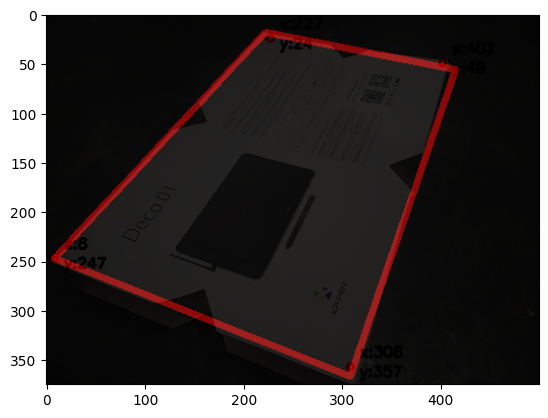

In [104]:
plt.imshow(cv2.cvtColor(image_display,cv2.COLOR_BGR2RGB))

In [27]:
x_cord = 0
y_cord = 0

def mouse_callback(event, x, y, flats, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), radius=3, color=(0, 0, 255), thickness=2)
        cv2.putText(img, f'x:{x}', (x+10,y-10) , 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (0,0,0), 2)
        cv2.putText(img, f'y:{y}', (x+10,y+10) , 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (0,0,0), 2)
        cv2.imshow('Image', img)
        print(f"Coordinates: {x}, {y}")

# Create a window and set the mouse callback function
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_callback)
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

Coordinates: 8, 247
Coordinates: 308, 357
Coordinates: 402, 49
Coordinates: 227, 24


-1

In [98]:
pts = np.array([pt_A, pt_B, pt_C, pt_D],np.int32)

cv2.polylines(img, 
              [pts.reshape((-1,1,2))], 
              True, 
              (0, 0, 255), 
              5)

cv2.fillConvexPoly(mask, pts.astype(int), (255,255,255))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

# Image masking

In [79]:
img1 = cv2.imread('cat.jpg')
img2 = cv2.imread('cat2.jpg')

In [83]:
img1 = cv2.resize(img1, (100,100))
img2 = cv2.resize(img2, (100,100))

In [96]:
masked = cv2.addWeighted(img1, 0.5, img2, 0.5, 50)

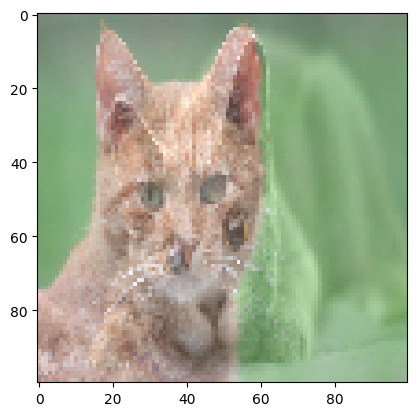

In [105]:
plt.imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB))

In [144]:
box_img = cv2.imread('./perspective-img.webp')

In [151]:
box_mask = np.zeros_like(box_img)

In [146]:
pt_A = [8, 247]
pt_B = [308, 367]
pt_C = [415, 56]
pt_D = [222, 18]

In [147]:
pts = np.array([pt_A, pt_B, pt_C, pt_D],np.int32)

In [156]:
cv2.fillConvexPoly(box_mask, pts.astype(int), (0,128,255))
print()

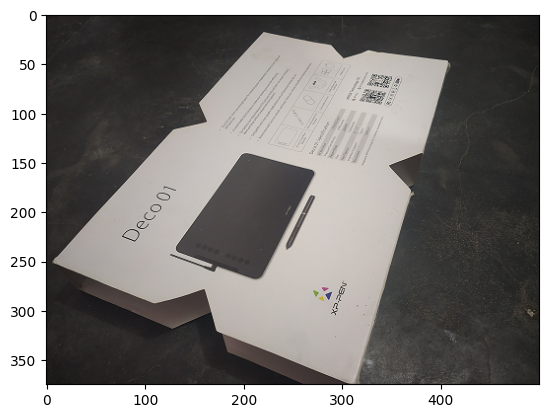

In [224]:
plt.imshow(cv2.cvtColor(box_img,cv2.COLOR_BGR2RGB))

In [159]:
box_masked = cv2.addWeighted(box_img, 0.5, box_mask, 0.5, 50)

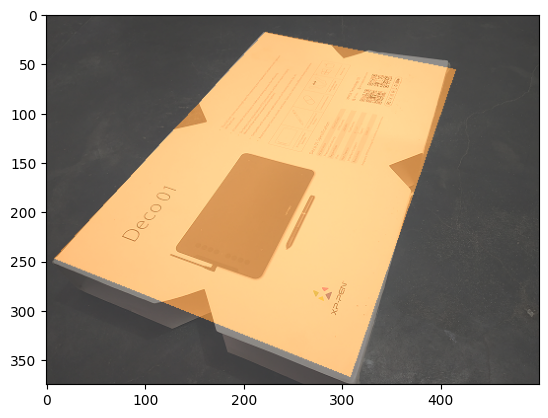

In [160]:
plt.imshow(cv2.cvtColor(box_masked,cv2.COLOR_BGR2RGB))

In [219]:
# Define the dimensions of the output rectangular shape
width, height = 300, 300
destination_pts = np.array([[0,0], 
                            [width-1,0], 
                            [width-1, height-1],
                            [0, height-1],
                           ], dtype='float32')

pts = np.array([pt_A, pt_D, pt_C, pt_B], dtype='float32')

In [220]:
matrix = cv2.getPerspectiveTransform(pts, destination_pts)

warped = cv2.warpPerspective(box_img, matrix, (width, height))

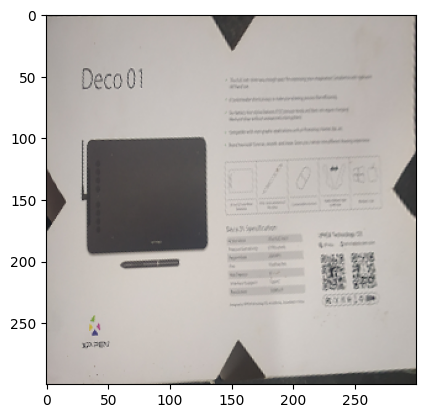

In [221]:
plt.imshow(cv2.cvtColor(warped,cv2.COLOR_BGR2RGB))